In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Step 1: Load the Dataset
# Load the dataset from the CSV file
data = pd.read_csv("D:\\taxi_trip_pricing.csv")

In [5]:
# Step 2: Data Cleaning and Preprocessing
# Inspect the dataset
print("Dataset Overview:")
print(data.head())

Dataset Overview:
   Trip_Distance_km Time_of_Day Day_of_Week  Passenger_Count  \
0             19.35     Morning     Weekday              3.0   
1             47.59   Afternoon     Weekday              1.0   
2             36.87     Evening     Weekend              1.0   
3             30.33     Evening     Weekday              4.0   
4               NaN     Evening     Weekday              3.0   

  Traffic_Conditions Weather  Base_Fare  Per_Km_Rate  Per_Minute_Rate  \
0                Low   Clear       3.56         0.80             0.32   
1               High   Clear        NaN         0.62             0.43   
2               High   Clear       2.70         1.21             0.15   
3                Low     NaN       3.48         0.51             0.15   
4               High   Clear       2.93         0.63             0.32   

   Trip_Duration_Minutes  Trip_Price  
0                  53.82     36.2624  
1                  40.57         NaN  
2                  37.27     52.9032  
3 

In [9]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [11]:
# check the missing values
data.isnull().sum().sort_values(ascending=False)

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Imputer for numerical columns
numerical_imputer = IterativeImputer(max_iter=10)

# Imputer for categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Columns for numeric imputation
numerical_columns = ['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 
                     'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes', 
                     'Trip_Price']

# Columns for categorical imputation
categorical_columns = ['Time_of_Day', 'Day_of_Week',  
                       'Traffic_Conditions', 'Weather']

for col in categorical_columns:
   data[[col]] = categorical_imputer.fit_transform(data[[col]]) 


In [15]:
# Loop to impute each column
for col in numerical_columns:
    data[col] = numerical_imputer.fit_transform(data[[col]])   
      
 
# check the missing values
data.isnull().sum().sort_values(ascending=False)

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

In [17]:
# Dictionary to store LabelEncoders for each column
label_encoders = {}

# Apply LabelEncoder to categorical columns
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
data.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.350000,2,0,3.0,1,0,3.560000,0.80,0.32,53.82,36.262400
1,47.590000,0,0,1.0,0,0,3.502989,0.62,0.43,40.57,56.874773
2,36.870000,1,1,1.0,0,0,2.700000,1.21,0.15,37.27,52.903200
3,30.330000,1,0,4.0,1,0,3.480000,0.51,0.15,116.81,36.469800
4,27.070547,1,0,3.0,0,0,2.930000,0.63,0.32,22.64,15.618000


In [19]:
# Selecting features for multiple regression
X_multiple = data[['Trip_Distance_km', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes']]

In [21]:
# Target variable
y = data['Trip_Price']

In [23]:
# ## Step 3: Implement Multiple Regression
# Splitting the data into training and testing sets
X_train_mult, X_test_mult, y_train_mult, y_test_mult = train_test_split(X_multiple, y, test_size=0.2, random_state=42)

In [25]:
# Creating and training the multiple regression model
model_multiple = LinearRegression()
model_multiple.fit(X_train_mult, y_train_mult)

LinearRegression()

In [27]:
# Predicting on the test data
y_pred_multiple = model_multiple.predict(X_test_mult)

In [29]:
# Calculating metrics for multiple regression
mse_multiple = mean_squared_error(y_test_mult, y_pred_multiple)
r2_multiple = r2_score(y_test_mult, y_pred_multiple)

In [31]:
print("\n### Multiple Regression Results ###")
print(f"Mean Squared Error (MSE): {mse_multiple}")
print(f"R^2 Score: {r2_multiple}")


### Multiple Regression Results ###
Mean Squared Error (MSE): 194.31527383690744
R^2 Score: 0.7659878505160337


In [33]:
# ## Step 4: Implement Simple Linear Regression
# Selecting a single feature for simple regression (Trip_Distance_km)
X_simple = data[['Trip_Distance_km']]

In [35]:
# Splitting the data into training and testing sets
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y, test_size=0.2, random_state=42)

In [37]:
# Creating and training the simple regression model
model_simple = LinearRegression()
model_simple.fit(X_train_simple, y_train_simple)

LinearRegression()

In [39]:
# Predicting on the test data
y_pred_simple = model_simple.predict(X_test_simple)

In [41]:
# Calculating metrics for simple regression
mse_simple = mean_squared_error(y_test_simple, y_pred_simple)
r2_simple = r2_score(y_test_simple, y_pred_simple)

In [43]:
print("\n### Simple Linear Regression Results ###")
print(f"Mean Squared Error (MSE): {mse_simple}")
print(f"R^2 Score: {r2_simple}")


### Simple Linear Regression Results ###
Mean Squared Error (MSE): 441.82802169607703
R^2 Score: 0.46791045800070585


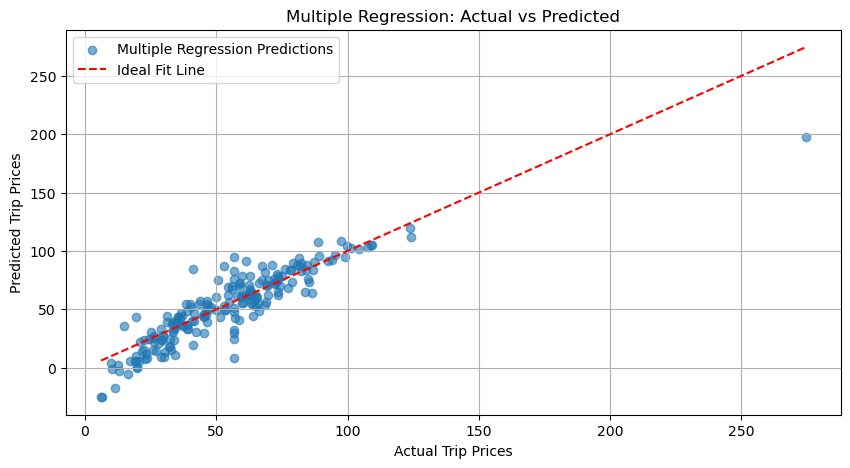

In [45]:
# ## Step 5: Visualizing Results
# Plotting predictions vs actual for multiple regression
plt.figure(figsize=(10, 5))
plt.scatter(y_test_mult, y_pred_multiple, alpha=0.6, label='Multiple Regression Predictions')
plt.plot([y_test_mult.min(), y_test_mult.max()], [y_test_mult.min(), y_test_mult.max()], 'r--', label='Ideal Fit Line')
plt.xlabel("Actual Trip Prices")
plt.ylabel("Predicted Trip Prices")
plt.title("Multiple Regression: Actual vs Predicted")
plt.legend()
plt.grid()
plt.show()

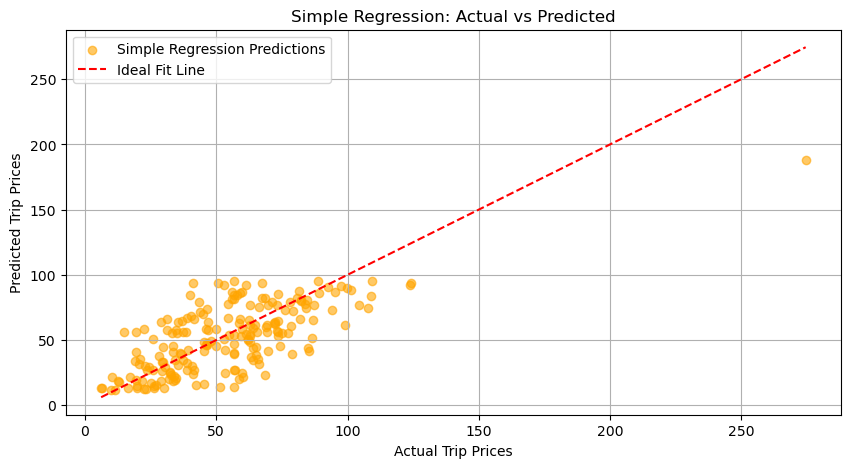

In [47]:
# Plotting predictions vs actual for simple regression
plt.figure(figsize=(10, 5))
plt.scatter(y_test_simple, y_pred_simple, alpha=0.6, label='Simple Regression Predictions', color='orange')
plt.plot([y_test_simple.min(), y_test_simple.max()], [y_test_simple.min(), y_test_simple.max()], 'r--', label='Ideal Fit Line')
plt.xlabel("Actual Trip Prices")
plt.ylabel("Predicted Trip Prices")
plt.title("Simple Regression: Actual vs Predicted")
plt.legend()
plt.grid()
plt.show()

In [49]:
# ## Step 6: Compare Performance
print("\n### Comparison of Multiple Regression vs Simple Regression ###")
print(f"Multiple Regression MSE: {mse_multiple}, R^2: {r2_multiple}")
print(f"Simple Regression MSE: {mse_simple}, R^2: {r2_simple}")


### Comparison of Multiple Regression vs Simple Regression ###
Multiple Regression MSE: 194.31527383690744, R^2: 0.7659878505160337
Simple Regression MSE: 441.82802169607703, R^2: 0.46791045800070585


In [51]:
if r2_multiple > r2_simple:
    print("\nMultiple Regression performs better than Simple Linear Regression.")
else:
    print("\nSimple Linear Regression performs better than Multiple Regression.")


Multiple Regression performs better than Simple Linear Regression.


In [53]:
# Inverse transform for encoded columns
for col in categorical_columns:
    # Retrieve the corresponding LabelEncoder for the column
    le = label_encoders[col]
    # Inverse transform the data and convert to integer type
    data[col] = le.inverse_transform(data[col].astype(int))
data.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.350000,Morning,Weekday,3.0,Low,Clear,3.560000,0.80,0.32,53.82,36.262400
1,47.590000,Afternoon,Weekday,1.0,High,Clear,3.502989,0.62,0.43,40.57,56.874773
2,36.870000,Evening,Weekend,1.0,High,Clear,2.700000,1.21,0.15,37.27,52.903200
3,30.330000,Evening,Weekday,4.0,Low,Clear,3.480000,0.51,0.15,116.81,36.469800
4,27.070547,Evening,Weekday,3.0,High,Clear,2.930000,0.63,0.32,22.64,15.618000


In [55]:
data.to_csv('Preprocessed_Data_of_Taxi_trip_pricing.csv')